In [ ]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import pandas as pd
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Lambda, MaxPooling2D, Dropout
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications import VGG16
from keras_preprocessing.image import ImageDataGenerator
from scipy import pi


2.1.1-dlenv_tfe


Using TensorFlow backend.


In [ ]:
trainDF = pd.read_csv("/home/jupyter/Thesis/train.txt", sep=" ", header=None)
trainDF.columns = ['Images', 'SteeringAngle'] 
trainDF['SteeringAngle'] = trainDF['SteeringAngle'] * (pi / 180)

testDF = pd.read_csv('/home/jupyter/Thesis/test.txt', sep=" ", header=None)
testDF.columns = ['Images', 'SteeringAngle'] 

datagen = ImageDataGenerator(
            rescale=1./255,
            zca_whitening=True,
            rotation_range=5,
            zoom_range=[0.1, 0.5],
            height_shift_range=[0.1,0.3],
            brightness_range=[0.55,1.0],
            fill_mode='nearest',
            validation_split=0.25)

trainData = trainDF.shape[0] * 0.75
valData = trainDF.shape[0] * 0.25
# print(trainData, valData)

test_datagen = ImageDataGenerator(rescale=1./255)

BatchSize = 98

train_generator=datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/home/jupyter/Thesis/train/",
x_col="Images",
y_col="SteeringAngle",
subset="training",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))

validation_generator = datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/home/jupyter/Thesis/train/",
x_col="Images",
y_col="SteeringAngle",
subset="validation",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 27342 validated image filenames.
Found 9114 validated image filenames.


In [ ]:
from keras.applications import VGG16

def ResNet50_FT(width, height, depth):

    model = VGG16(weights='imagenet', include_top=False, input_shape=(height, width, depth))

#     model = models.Sequential()
#     model.add(conv_base)
#     conv_base.trainable = False
#     model.add(layers.Flatten())

#     model.add(Dense(1164, activation='relu'))
#     model.add(Dropout(0.3))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(50, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(10, activation='relu'))    
#     model.add(Dense(1, activation='linear'))

    return model
model = ResNet50_FT(width=200, height=100, depth=3)
print (model.summary())

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 100, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 100, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 100, 128)      147584    
______________________________________________________________

In [ ]:
from keras.applications import ResNet50V2

def ResNet50_FT(width, height, depth):

    conv_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    model = models.Sequential()
    model.add(conv_base)
    conv_base.trainable = False
    model.add(layers.Flatten())

    model.add(Dense(1164, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))    
    model.add(Dense(1, activation='linear'))

    return model


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


279/279 [==============================] - 293s 1s/step - loss: 0.2062 - val_loss: 0.1729

Epoch 00001: val_loss improved from inf to 0.17294, saving model to /home/jupyter/Thesis/ResNet50/ResNet50_FT_weights.01-0.17.h5
Epoch 2/10
  1/279 [..............................] - ETA: 36s - loss: 0.0123

/opt/conda/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


279/279 [==============================] - 287s 1s/step - loss: 0.2064 - val_loss: 0.1683

Epoch 00002: val_loss improved from 0.17294 to 0.16831, saving model to /home/jupyter/Thesis/ResNet50/ResNet50_FT_weights.02-0.17.h5
Epoch 3/10
279/279 [==============================] - 279s 1000ms/step - loss: 0.2069 - val_loss: 0.1702

Epoch 00003: val_loss did not improve from 0.16831
Epoch 4/10
279/279 [==============================] - 279s 1s/step - loss: 0.2063 - val_loss: 0.1737

Epoch 00004: val_loss did not improve from 0.16831
Epoch 5/10
279/279 [==============================] - 280s 1s/step - loss: 0.2062 - val_loss: 0.1678

Epoch 00005: val_loss improved from 0.16831 to 0.16781, saving model to /home/jupyter/Thesis/ResNet50/ResNet50_FT_weights.05-0.17.h5
Epoch 6/10
279/279 [==============================] - 278s 997ms/step - loss: 0.2056 - val_loss: 0.1690

Epoch 00006: val_loss did not improve from 0.16781
Epoch 7/10
279/279 [==============================] - 280s 1s/step - loss: 

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/o

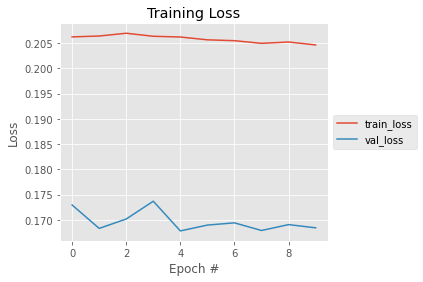

In [ ]:
from keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 10

model = ResNet50_FT(width=200, height=100, depth=3)

filepath =  "/home/jupyter/Thesis/ResNet50/ResNet50_DA_weights.08-0.17.h5"

model.load_weights(filepath)

conv_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(100, 200, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_preact_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adadelta(lr=1e-3), loss="mse")

filepath1 = "/home/jupyter/Thesis/ResNet50/ResNet50_FT_weights.{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath1, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

history = model.fit(
                train_generator,
                steps_per_epoch=round(trainData/BatchSize),
                epochs=NUM_EPOCHS,
                validation_data=validation_generator,
                validation_steps=round(valData/BatchSize),
                callbacks=[checkpoint])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

avg_train_loss = sum(history.history["loss"])/NUM_EPOCHS
avg_val_loss = sum(history.history["val_loss"])/NUM_EPOCHS

print("avg_train_loss: " + str(avg_train_loss))
print("avg_val_loss: " + str(avg_val_loss))
print("difference: " + str(abs(avg_train_loss - avg_val_loss)))


model.save_weights(filepath)

In [ ]:
from keras.models import load_model

test_generator=test_datagen.flow_from_dataframe(
dataframe=testDF,
directory="/home/jupyter/Thesis/test/",
x_col="Images",
# y_col="SteeringAngle",
y_col=None,    
batch_size=100,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,200))

filepath = "/home/jupyter/Thesis/ResNet50/ResNet50_FT_weights.05-0.17.h5"

model.load_weights(filepath)


predictions = model.predict(test_generator)
print('Predictions: ', predictions.shape)

Found 8950 validated image filenames.
Predictions:  (8950, 1)


In [ ]:
import pandas as pd

Images = testDF['Images']
preds = predictions
actual = testDF['SteeringAngle']

df_preds = pd.DataFrame(Images)
df_preds['Actual Steering Angle'] = (actual * (pi / 180))
df_preds['Predicted Steering Angle'] = preds
df_preds.rename(columns = {0:'Images'}, inplace = True) 

df_preds['MAE'] = 0

for i in range(len(df_preds)):
  df_preds.iloc[i, -1] = abs(df_preds.iloc[i, 1] - df_preds.iloc[i, 2])

mae_sum = 0
for i in range(len(df_preds)):
    mae_sum += df_preds.iloc[i, -1]
    
print("mae_sum: " + str(mae_sum))    
MAE = mae_sum / len(df_preds)
print("len(df_preds): " + str(len(df_preds)))
print("MAE: " + str(MAE))

mae_sum: 2022.561084394157
len(df_preds): 8950
MAE: 0.22598447870325777
